In [1]:
import sys
sys.path.append("/home/zixuan11/qjx/FastEdit/")
from fastedit.utils.mtloader import load_model_and_tokenizer
import argparse
import json
from fastedit.utils.generate import generate_fast
from fastedit.rome import ROMEHyperParams,apply_rome_to_model
from fastedit.utils.template import Template
from transformers import PreTrainedModel, PreTrainedTokenizer, TextStreamer
import os
import torch
torch.cuda.set_device(7)
torch.cuda.current_device()
# os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from typing import List, Optional
import torch
import seaborn as sns

from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import copy
from experimental_data import *
from gradient import calculate_gradient
from plot import plot_gradients,draw_gradient_heatmap,compare_two_matrix_svd,inner_product_between_contexts,inner_product_heapmap
model,tokenizer,batch_first= load_model_and_tokenizer("/data/chihan3/cache/llama-2/llama-2-7b-hf",None,7)
with open(edited_data_path,"r") as json_file:
    edited_data = json.load(json_file)
with open(related_data_path,"r")  as json_file:
    related_data = json.load(json_file)
example = related_data[0]
hparams = ROMEHyperParams.from_name("llama-7b")
template = Template(name="default")
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
# contexts = different_facts
# targets = different_facts_targets

In [2]:
gradients_model_contexts = dict()
for i in range(len(contexts)):
    gradients,loss= calculate_gradient(model,tokenizer,contexts[i],targets[i],plot=False)
    gradients_model_contexts[contexts[i]] = copy.deepcopy(gradients)
torch.cuda.empty_cache()

tensor(6.7008, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(3.4610, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(2.8292, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.0885, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.8893, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(4.3905, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.4746, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.1819, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(6.5110, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.0294, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.7662, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.5931, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.4413, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.4786, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(1.5481, device='cuda:7', grad_fn=<NllLossBackward0>)
tensor(0.4866, device='cuda:7', grad_fn=<NllLossBackward0>)


In [3]:
all_l1_results = {}
for i in gradients_model_contexts:
    y = dict()
    for param in gradients_model_contexts[i]:
        y[param] = torch.sum(torch.abs(gradients_model_contexts[i][param])).item()
    all_l1_results[i] = y
all_layers = dict()

for name in names:
    all_layers[name] = dict()
    for i in contexts:
        all_layers[name][i] = []
    
for context in all_l1_results:
    for current_name in all_l1_results[context]:
        for name in names:
            if name in current_name:
                all_layers[name][context].append(all_l1_results[context][current_name])
                continue
    # plt.plot(x, ys[i], linestyle='-',label=i)
# for name in all_l1_r

In [2]:
# str_gradient_dict = dict()
# for i in range(6):
#     temp_dict = dict()
#     context = contexts[i]
#     target = targets[i]
#     model_gradients,loss = calculate_gradient(model,tokenizer,context,target,plot=False)
#     for param in model_gradients:
#         temp_dict[param] = [torch.sum(torch.abs(model_gradients[param])).item(),model_gradients[param].norm(p=2).item(),model_gradients[param].norm(p=float('inf')).item(),torch.sum(model_gradients[param]).item()]
#     str_gradient_dict[context] =  temp_dict

The name of the country of citizenship of Leonardo DiCaprio is Syria


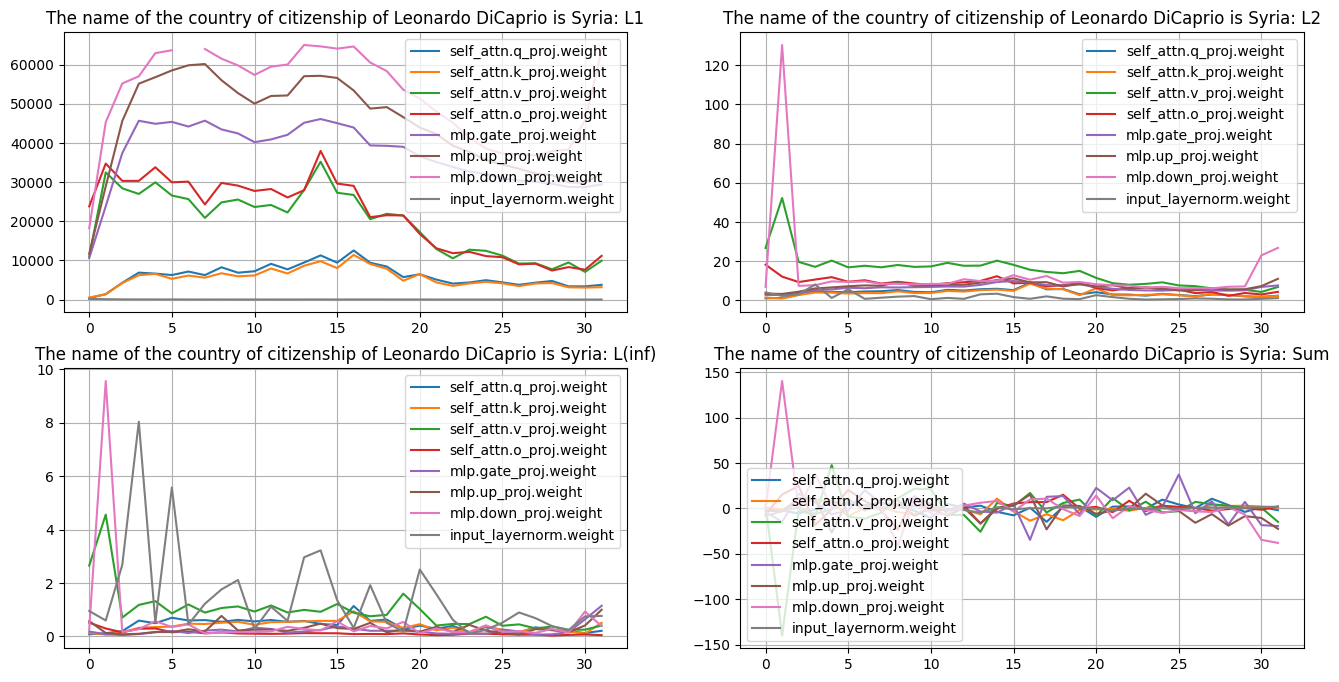

In [5]:
# all_y = str_gradient_dict[contexts[0]]
# print(contexts[0])

# plt.figure(figsize=(16,8))
# sub_names = ["L1","L2","L(inf)","Sum"]
# for index in range(4):
#     plt.subplot(2,2,index+1)
#     ys = {}
#     for name in names:
#         ys[name] = []
#         for i in all_y:
#             if name in i:
#                 ys[name].append(all_y[i][index])

#     x = [i for i in range(32)]
#     # y0 = [ str_gradient_dict[contexts[0]]]
#     for i in ys:
#         plt.plot(x, ys[i], linestyle='-',label=i)
#     # Add labels and title
#     # plt.xlabel('X-Axis Label')
#     # plt.ylabel('Y-Axis Label')
#     plt.title(f"{contexts[0]}: {sub_names[index]}")
#     plt.legend()

    
#     # Show the plot
#     plt.grid(True)
# plt.show()

mlp.down_proj.weight


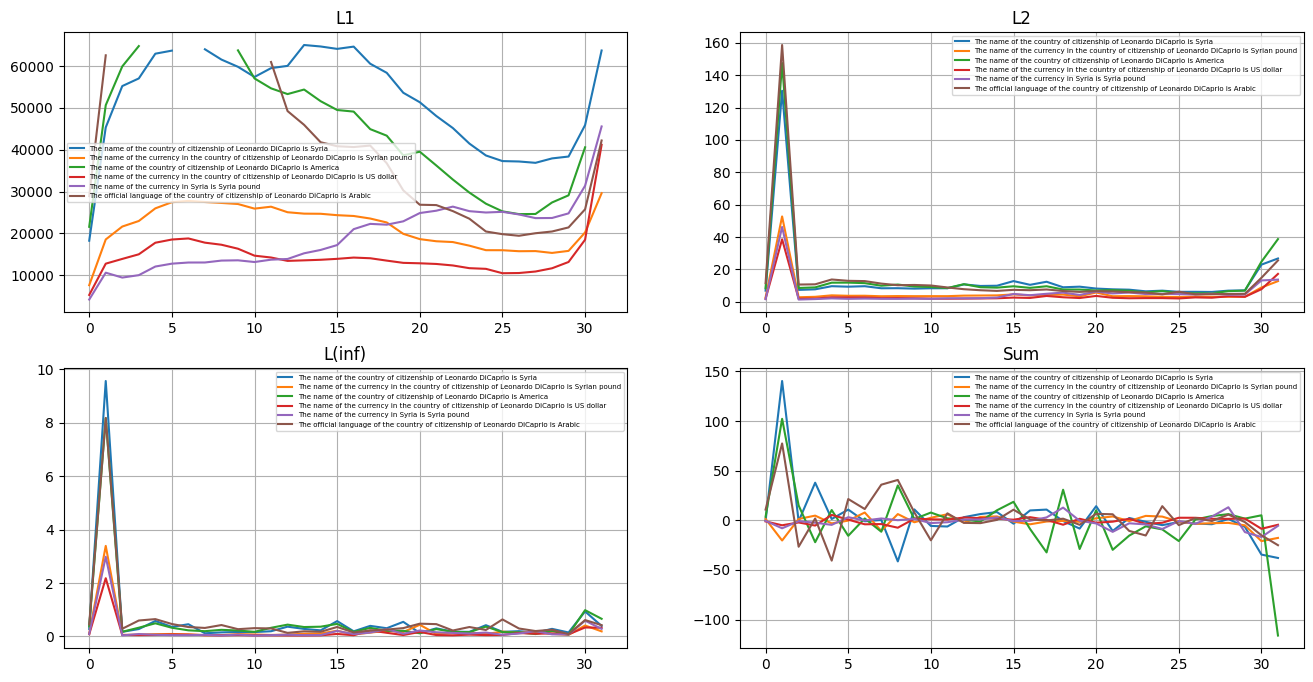

In [6]:
# best_name = "mlp.down_proj.weight"
# print(best_name)
# ys = {}
# plt.figure(figsize=(16,8))
# index = 0
# for index in range(4):
#     plt.subplot(2,2,index+1)
#     for context in contexts:
#         ys[context] = []
#         all_y = str_gradient_dict[context]
#         for name in all_y:
#             if best_name in name:
#                 ys[context].append(all_y[name][index])

#     for i in ys:
#         plt.plot(x, ys[i], linestyle='-',label=i)
#     # Add labels and title
#     # plt.xlabel('X-Axis Label')
#     # plt.ylabel('Y-Axis Label')
#     plt.title(f"{sub_names[index]}")
#     plt.legend(fontsize=5)
#     # Show the plot
#     plt.grid(True)

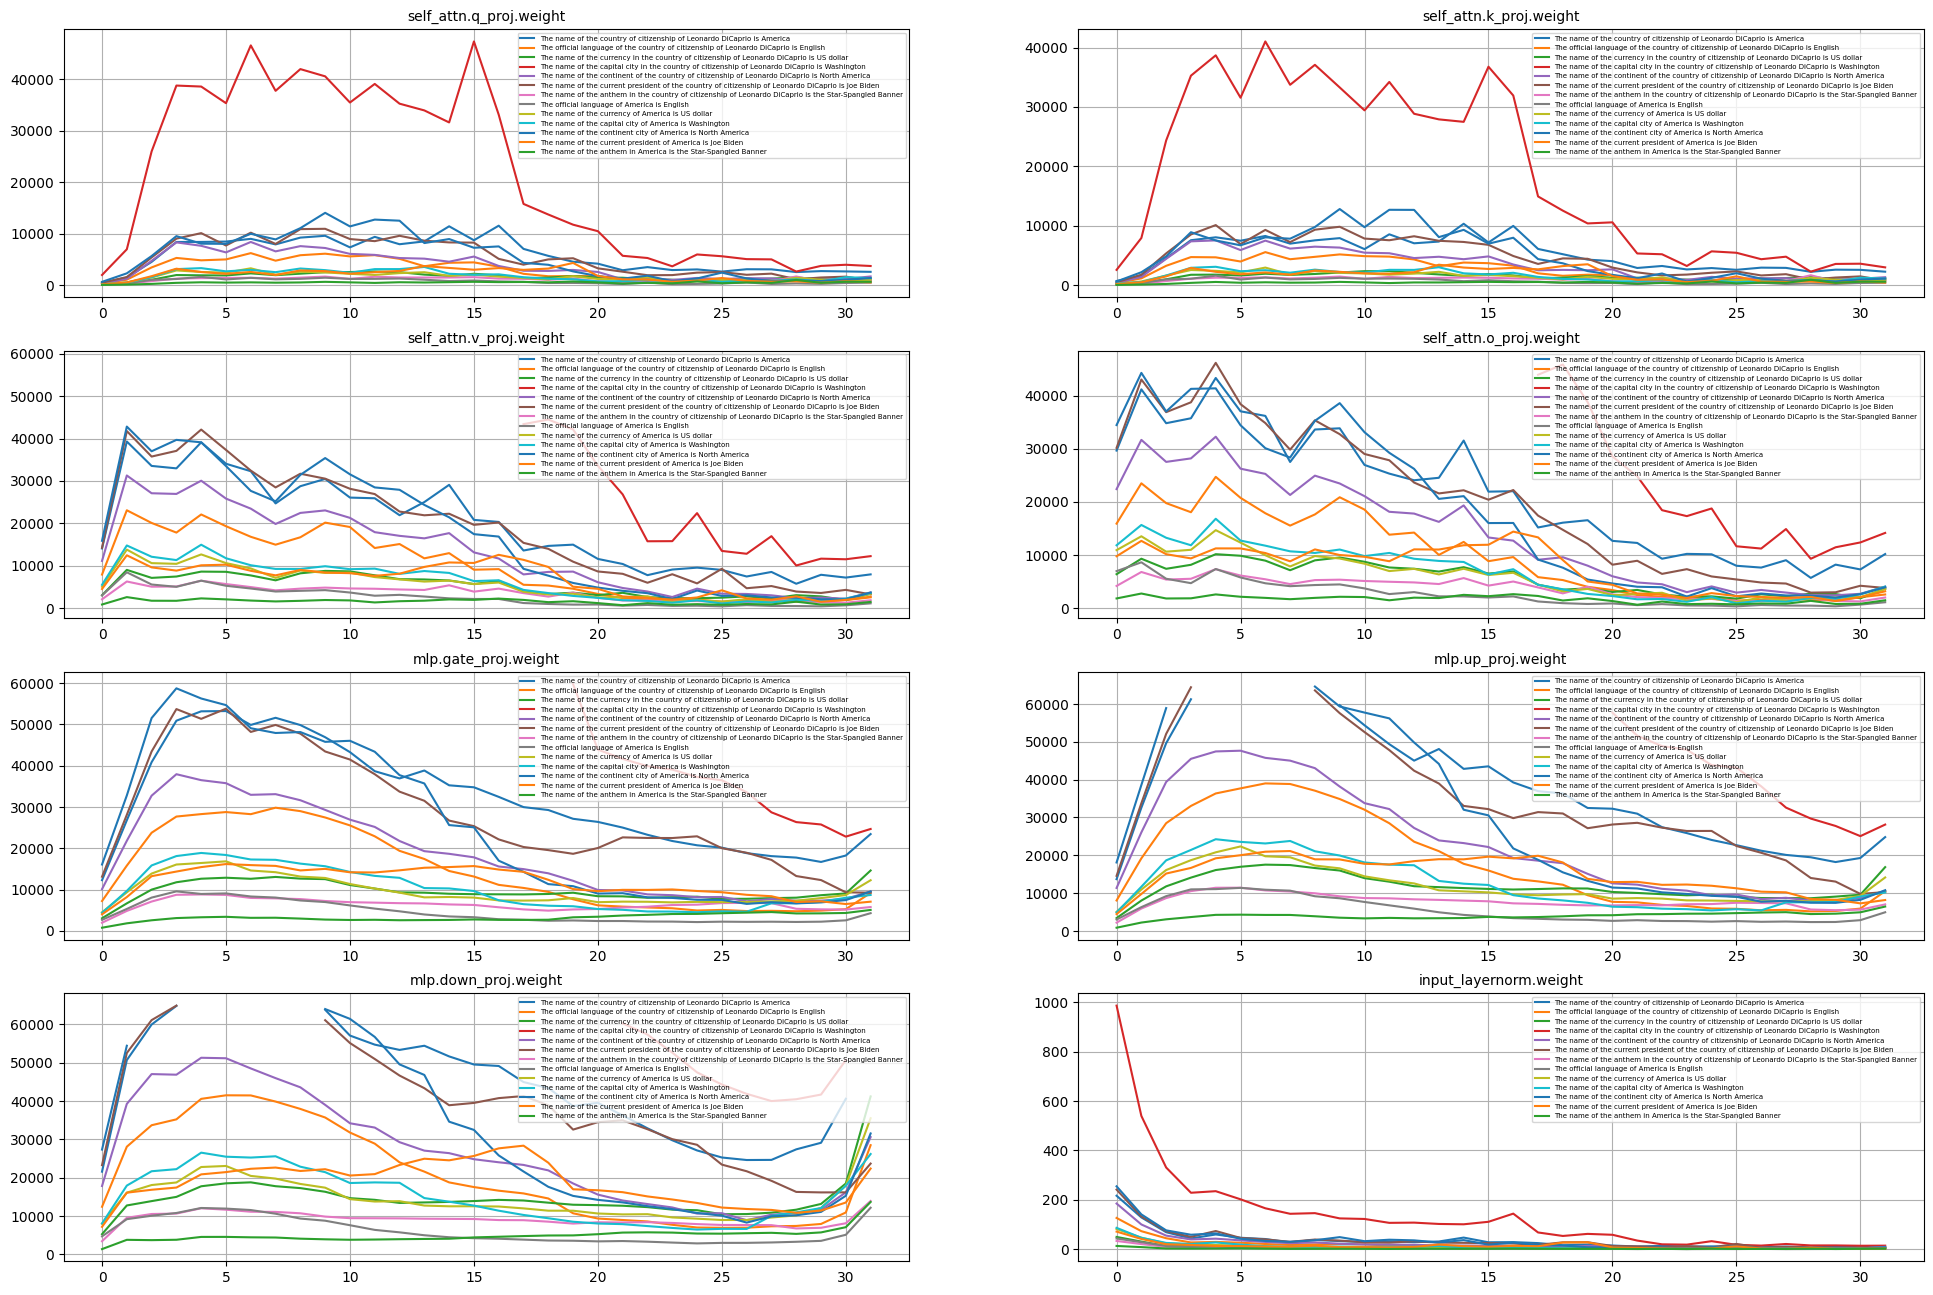

In [5]:
plt.figure(figsize=(24,16))
count = 0
for name in all_layers:
    count+=1
    plt.subplot(4,2,count)
    for context in  all_layers[name]:
        plt.plot(all_layers[name][context],linestyle='-',label=context)
    plt.title(name,fontsize=10)
    plt.legend(fontsize=5)
    plt.grid(True)

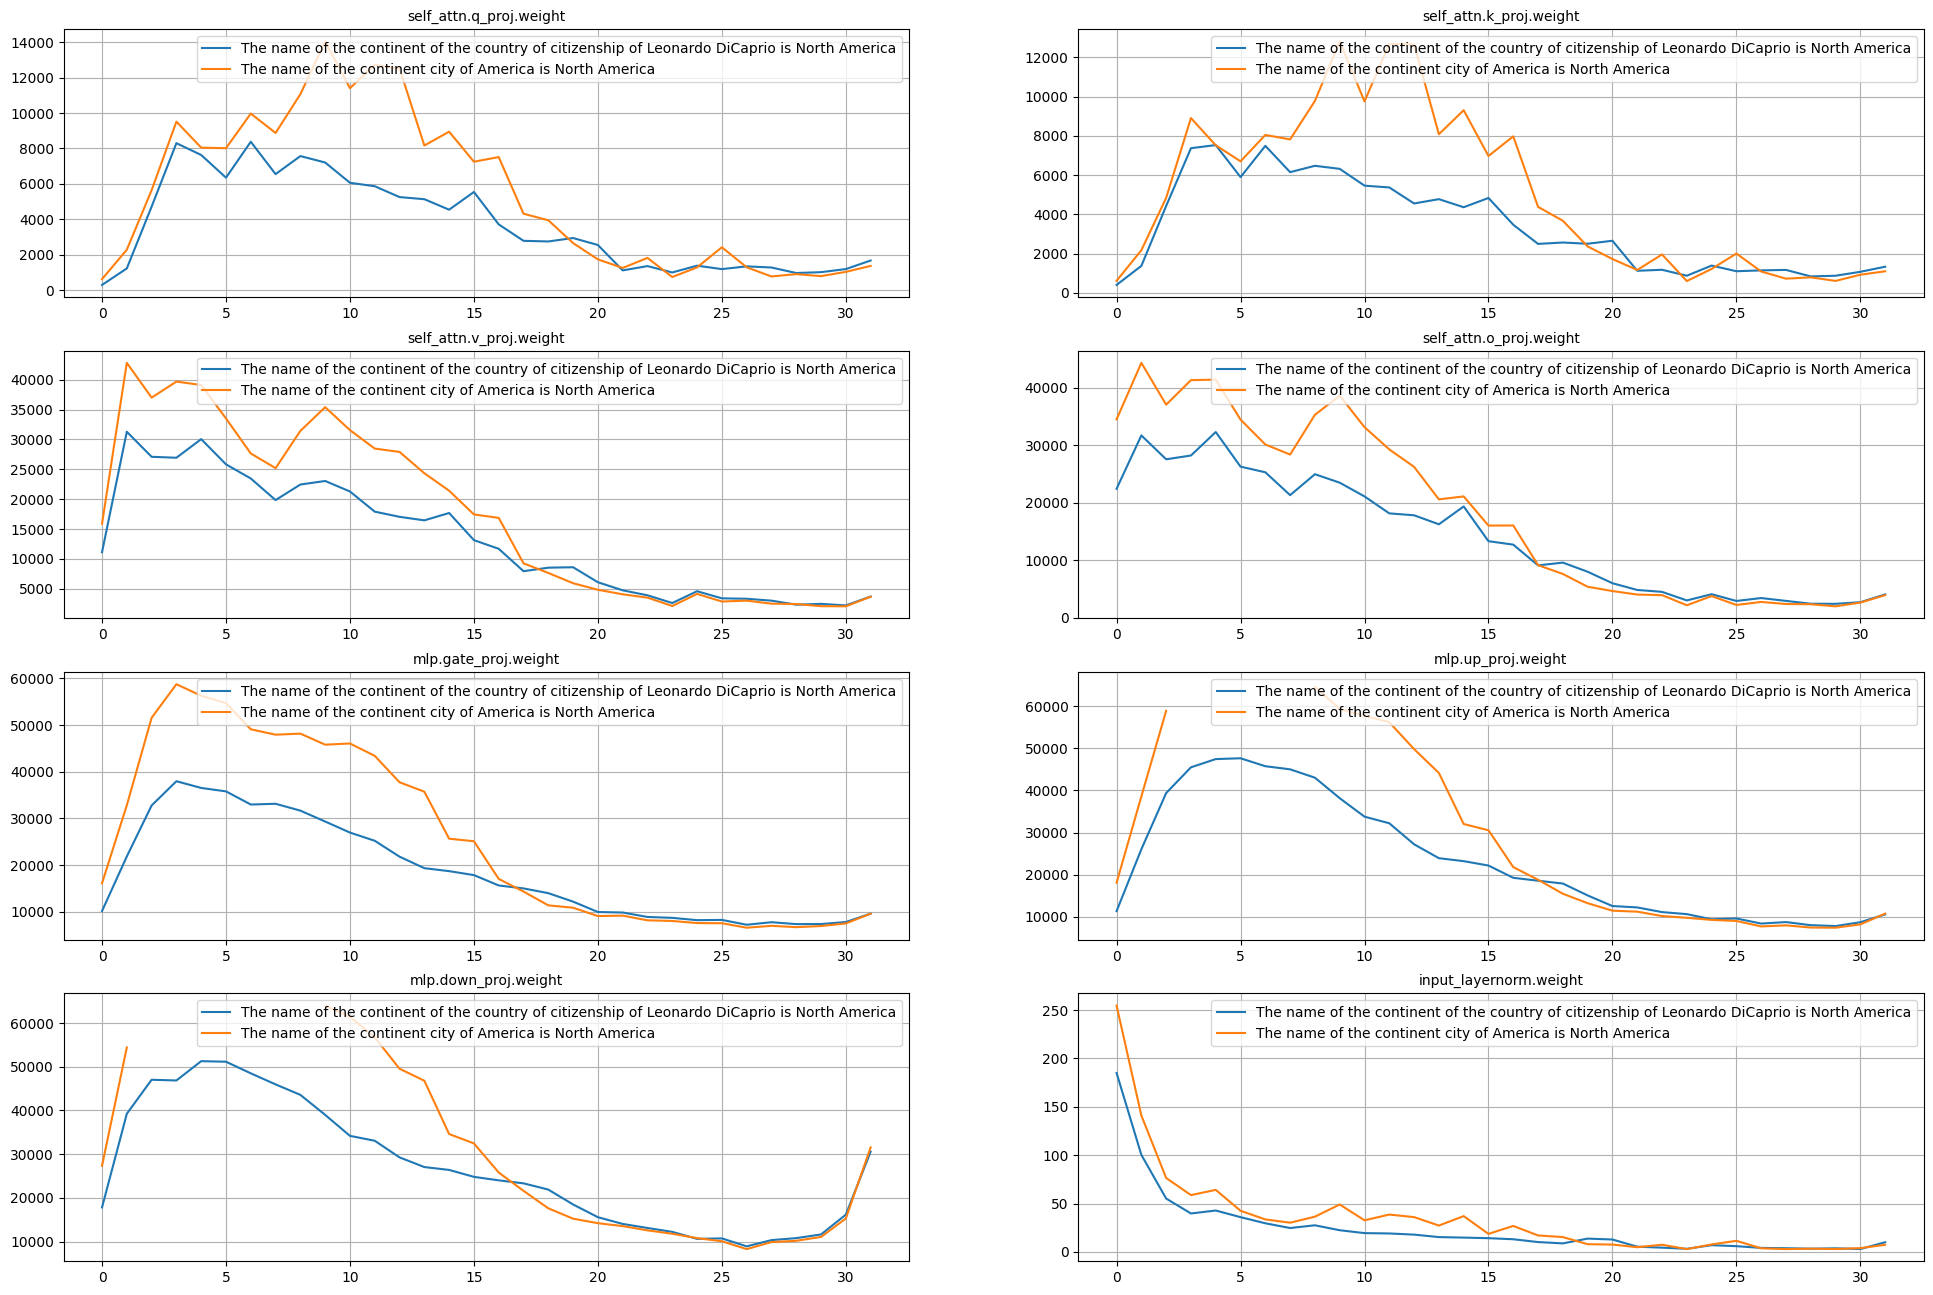

In [27]:
plt.figure(figsize=(24,16))
count = 0
compare = [contexts[4],contexts[10]]
for name in all_layers:
    count+=1
    plt.subplot(4,2,count)
    for aa in compare:
        plt.plot(all_layers[name][aa],linestyle='-',label=aa)
    plt.title(name,fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(True)

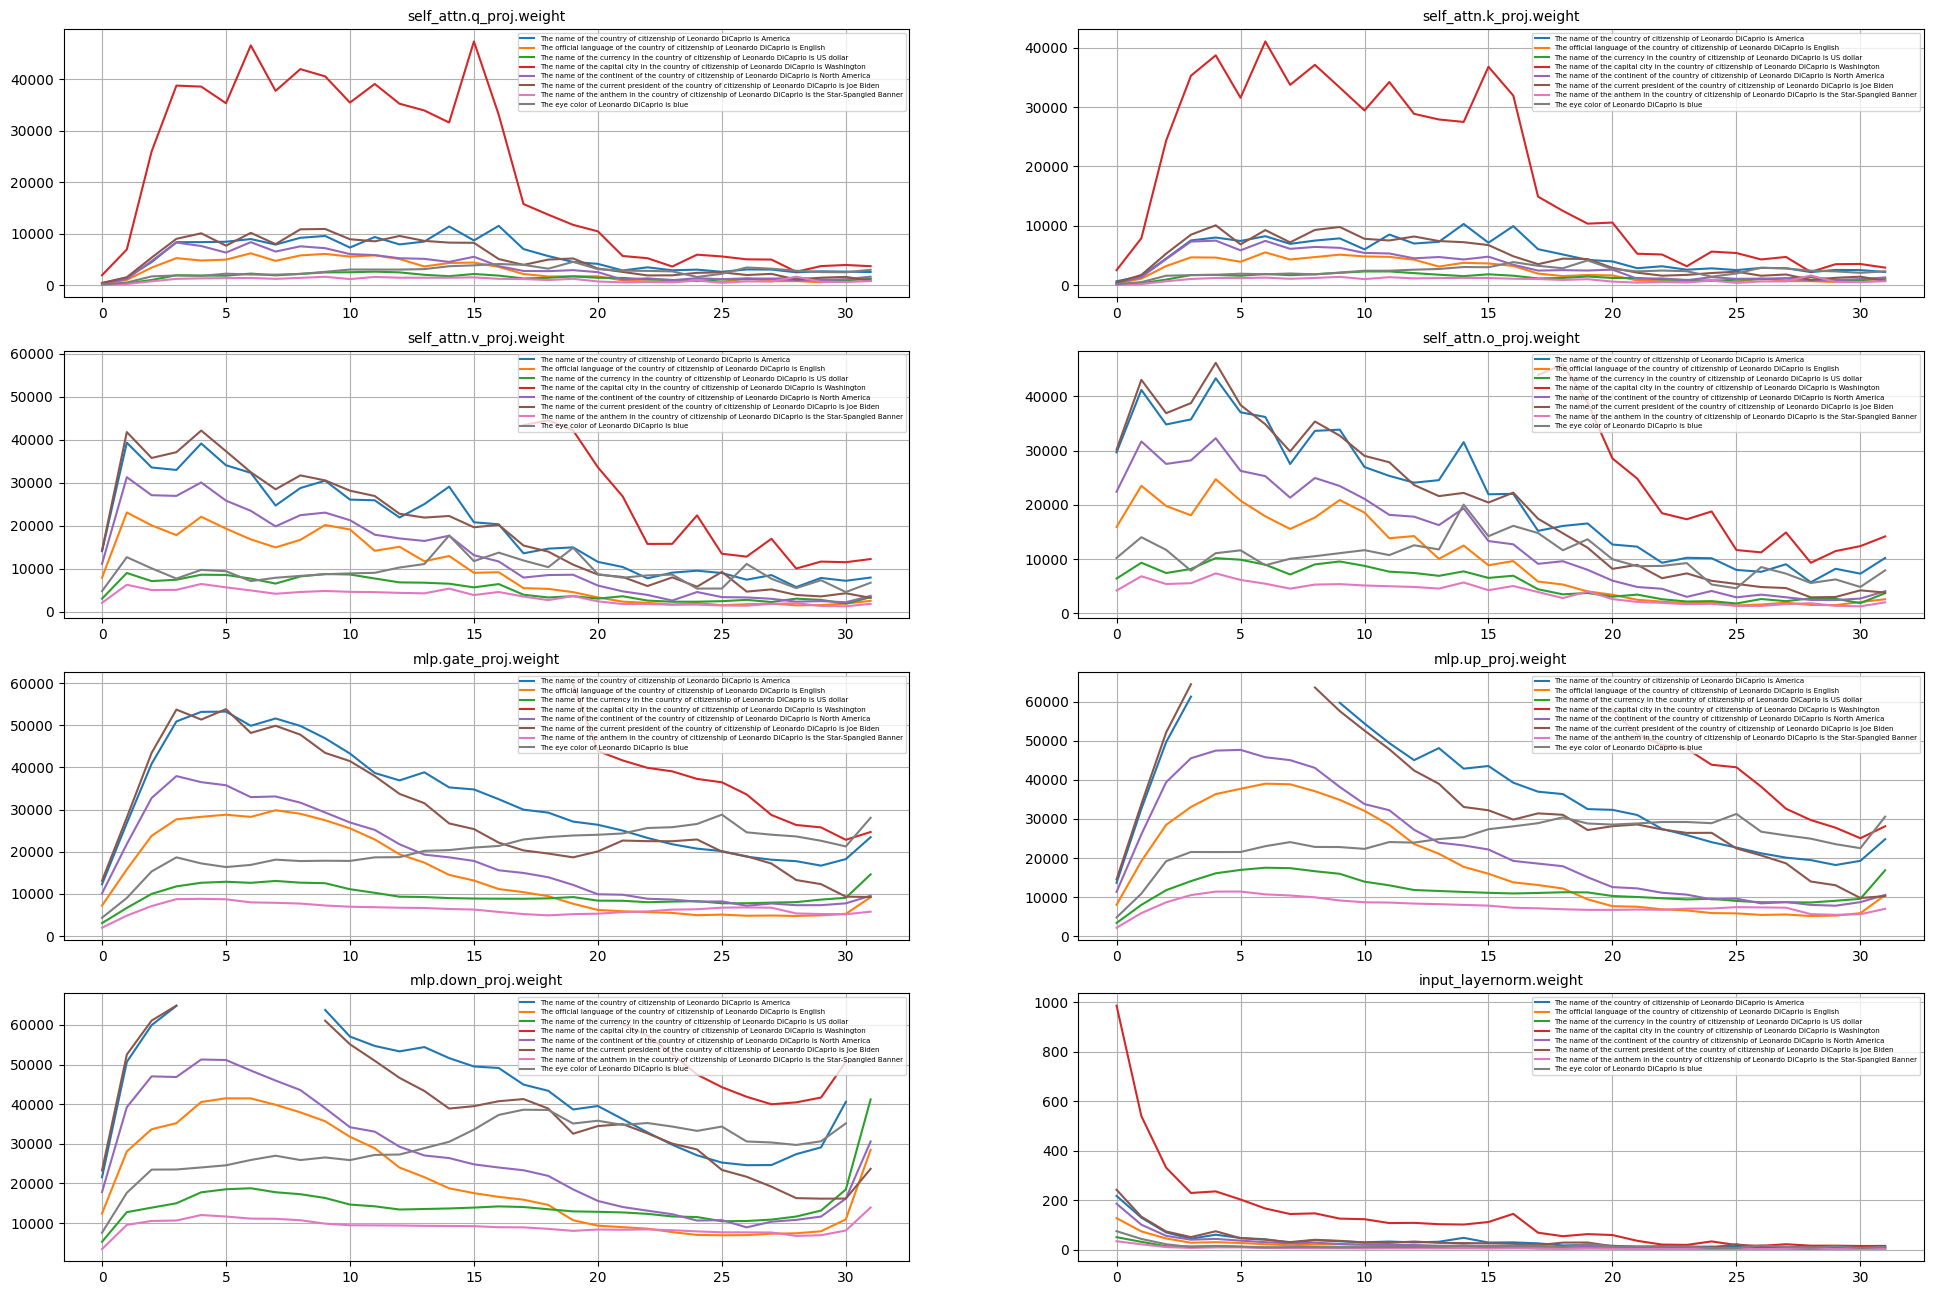

In [5]:
# plt.figure(figsize=(24,16))
# count = 0
# for name in all_layers:
#     count+=1
#     plt.subplot(4,2,count)
#     for context in  all_layers[name]:
#         plt.plot(all_layers[name][context],linestyle='-',label=context)
#     plt.title(name,fontsize=10)
#     plt.legend(fontsize=5)
#     plt.grid(True)

In [5]:
names

['self_attn.q_proj.weight',
 'self_attn.k_proj.weight',
 'self_attn.v_proj.weight',
 'self_attn.o_proj.weight',
 'mlp.gate_proj.weight',
 'mlp.up_proj.weight',
 'mlp.down_proj.weight',
 'input_layernorm.weight']

['The name of the country of citizenship of Leonardo DiCaprio is Syria', 'The name of the currency in the country of citizenship of Leonardo DiCaprio is Syrian pound', 'The name of the country of citizenship of Leonardo DiCaprio is America', 'The name of the currency in the country of citizenship of Leonardo DiCaprio is US dollar', 'The name of the currency in Syria is Syria pound', 'The official language of the country of citizenship of Leonardo DiCaprio is Arabic']


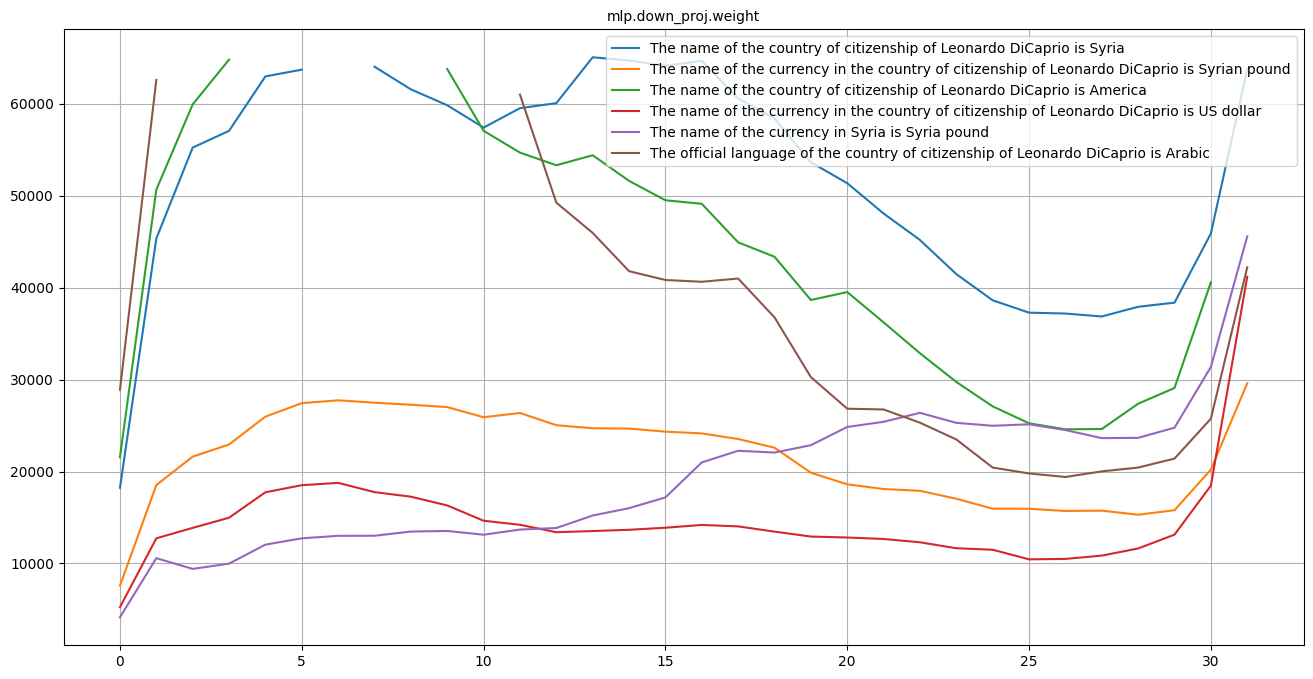

In [9]:
plt.figure(figsize=(16,8))
count = 0
compare = [contexts[0],contexts[1],contexts[2],contexts[3],contexts[4],contexts[5]]

print(compare)
name =  'mlp.down_proj.weight'
for aa in compare:
    plt.plot(all_layers[name][aa],linestyle='-',label=aa)
plt.title(name,fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
# for name in all_layers:
#     count+=1
#     plt.subplot(4,2,count)
#     for aa in compare:
#         plt.plot(all_layers[name][aa],linestyle='-',label=aa)
#     plt.title(name,fontsize=10)
#     plt.legend(fontsize=10)
#     plt.grid(True)

['The name of the country of citizenship of Leonardo DiCaprio is America', 'The official language of the country of citizenship of Leonardo DiCaprio is English', 'The official language of America is English']


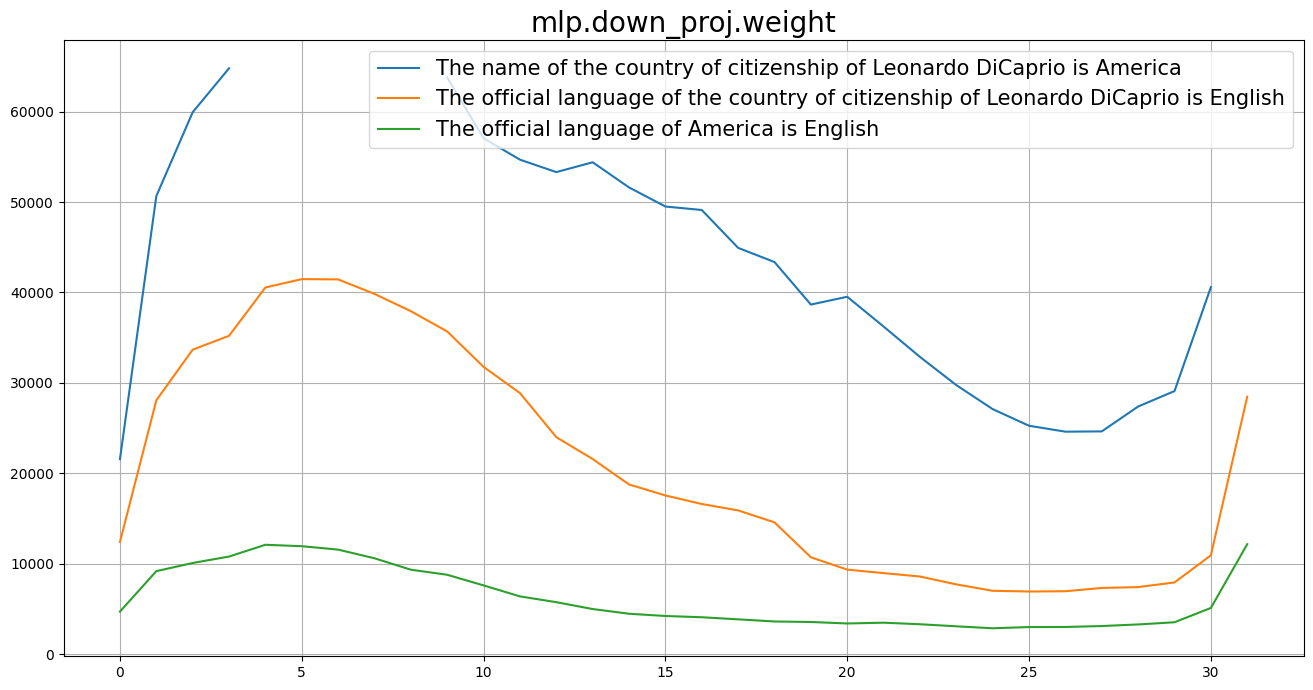

In [21]:
plt.figure(figsize=(16,8))
count = 0
compare = [contexts[2],contexts[6],contexts[7]]

print(compare)
name =  'mlp.down_proj.weight'
for aa in compare:
    plt.plot(all_layers[name][aa],linestyle='-',label=aa)
plt.title(name,fontsize=20)
plt.legend(fontsize=15)
plt.grid(True)
# for name in all_layers:
#     count+=1
#     plt.subplot(4,2,count)
#     for aa in compare:
#         plt.plot(all_layers[name][aa],linestyle='-',label=aa)
#     plt.title(name,fontsize=10)
#     plt.legend(fontsize=10)
#     plt.grid(True)

['The name of the country of citizenship of Leonardo DiCaprio is America', 'The name of the anthem in the country of citizenship of Leonardo DiCaprio is the Star-Spangled Banner', 'The name of the anthem in America is the Star-Spangled Banner']


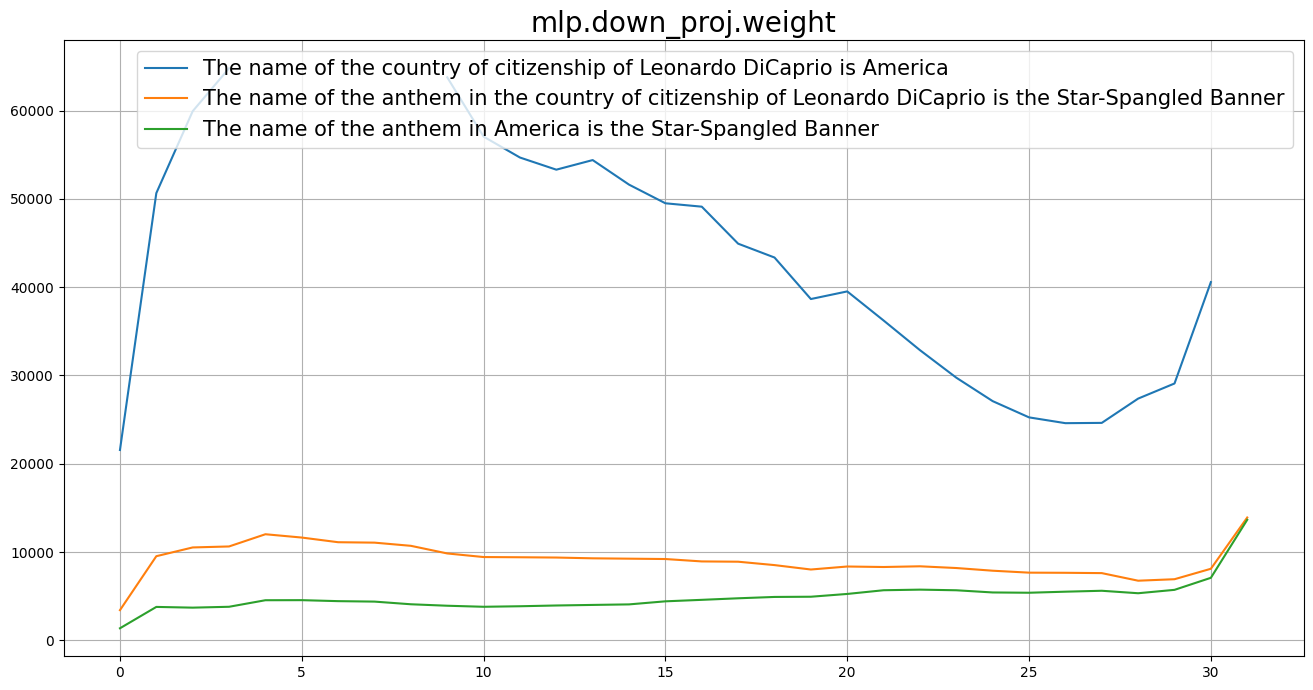

In [28]:
plt.figure(figsize=(16,8))
count = 0
compare = [contexts[2],contexts[11],contexts[15]]

print(compare)
name =  'mlp.down_proj.weight'
for aa in compare:
    plt.plot(all_layers[name][aa],linestyle='-',label=aa)
plt.title(name,fontsize=20)
plt.legend(fontsize=15)
plt.grid(True)
# for name in all_layers:
#     count+=1
#     plt.subplot(4,2,count)
#     for aa in compare:
#         plt.plot(all_layers[name][aa],linestyle='-',label=aa)
#     plt.title(name,fontsize=10)
#     plt.legend(fontsize=10)
#     plt.grid(True)